In [45]:
# Create Training DataSet and Model Testing Dataset of Results DataFrame 

import pandas
import numpy as np 
import matplotlib.pyplot as plt  
from pandas.api.types import is_numeric_dtype
from pandas import read_csv 
import seaborn as sns
race_results = read_csv('results_full3(+tyrestrat_weather).csv')
del race_results['name_x.1']

In [52]:
for col in race_results.columns:
    #if not is_numeric_dtype(race_results[col]):
        race_results[col] = race_results[col].astype('category') 
        race_results[col] = race_results[col].cat.codes
list(race_results)

['Unnamed: 0',
 'resultId',
 'raceId',
 'driverId',
 'constructorId',
 'grid',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'fastestLapTime',
 'fastestLapSpeed',
 'status',
 'driverRef',
 'dob',
 'nationality_x',
 'year',
 'round',
 'name_x',
 'date',
 'circuitRef',
 'location',
 'country',
 'constructorRef',
 'nationality_y',
 'position_quali',
 'stop',
 'lap',
 'milliseconds',
 'clusters',
 'name_y',
 'weather',
 'SC Laps']

In [53]:
#splitting the dataset into the Predictors (independant variables) and the Result variable (dependant variable)
#Also removing similar columns to make feature selection more accurate and account for similar variables
predictors = race_results.drop('positionOrder', axis =1) 
predictors = predictors.drop('positionText', axis =1)
predictors = predictors.drop('date', axis =1)
predictors = predictors.drop('position_quali', axis =1)
predictors = predictors.drop('raceId', axis =1)

PositionOrder = race_results[['positionOrder']] #only the Position column


In [54]:
#running Recursive Feature Elimination to get top 5 variables for use in KNN model 

# Compute Information Gain of each feauture and select only features with GINI greater than 70 

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets

svm = ExtraTreesClassifier()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 5)
rfe = rfe.fit(predictors,PositionOrder)
# print summaries for the selection of attributes
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))



Num Features: 5
Selected Features: [False  True False False  True  True False  True  True False False False
 False False False False False False False False False False False False
 False False False False]
Feature Ranking: [ 3  1  2  8  1  1  4  1  1  9 12  6 17 14  5 18 16 10 15 20 19 24 23 22  7
 13 21 11]


In [68]:

#Select Only the High performing predictors from feature selection above
predictors = race_results[['driverId','points','laps','fastestLapTime','fastestLapSpeed']] 
list(predictors)
predictors.head()

,driverId,points,laps,fastestLapTime,fastestLapSpeed
0,5,0,43,204,525
1,4,7,45,192,607
2,3,0,27,189,620
3,3,0,27,189,620
4,6,8,45,190,617


In [69]:
# Spliting Data into 60% Training and 40% Testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors,PositionOrder, test_size=0.4) 

In [70]:
# Run Build KNN model and predict testing data 
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [71]:
# Test KNN Model using Testing Dataset 
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.1951530612244898)


Results for using KNN to Predict the PositionOrder:
('Prediction Accuracy:', 0.1951530612244898)


Text(0.5,15,u'Predicted label')

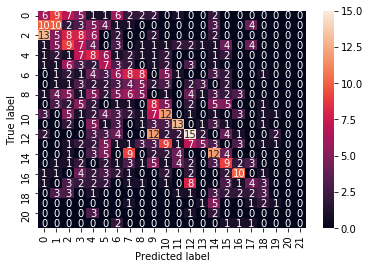

In [72]:
# Build Confusion Matrix of predicted results 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#Results for KNN Classification for Predicting PositionOrder
print('Results for using KNN to Predict the PositionOrder:')
print('Prediction Accuracy:', metrics.accuracy_score(y_test, y_pred))
#print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
#print('Classification Report: \n', metrics.classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [74]:
# Redo KNN To predict and Classify Points finished

#Add lables to points colum to simple predict if a driver got points or no points at all
predictors = race_results[['driverId','positionOrder','laps','fastestLapTime','fastestLapSpeed']] 
outcome = race_results[['points']]
outcome['Finish']=np.where(outcome['points']> 0.0, 'P', 'N')
outcome = outcome.drop('points', axis =1)


# Spliting Data into 60% Training and 40% Testing 
X_train, X_test, y_train, y_test = train_test_split(predictors,outcome, test_size=0.4)

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Results for using KNN to Predict Attainment of Points:
('Prediction Accuracy:', 0.81377551020408168)


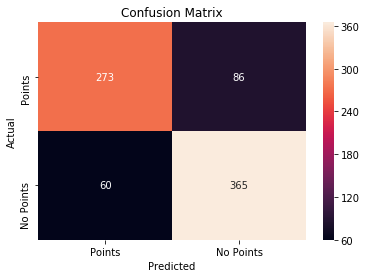

In [77]:
confusion_matrix(y_test, y_pred)
#Results for KNN Classification for Predicting PositionOrder
print('Results for using KNN to Predict Attainment of Points:')
print('Prediction Accuracy:', metrics.accuracy_score(y_test, y_pred))
#print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
#print('Classification Report: \n', metrics.classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['Points', 'No Points']);